In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [ ]:
df = pd.read_csv('sqliv2.csv', encoding='utf-8') 
df.head(10)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [4]:
del df['Unnamed: 2']

del df['Unnamed: 3']

In [5]:
df.shape

(30919, 2)

In [ ]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [7]:
print("----------------------------------------------------")
df.info()
print("----------------------------------------------------")

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30904 non-null  object
 1   Label     30664 non-null  object
dtypes: object(2)
memory usage: 483.2+ KB
----------------------------------------------------


In [8]:
df['Label'].describe()

count     30664
unique       42
top           0
freq      19268
Name: Label, dtype: object

In [9]:
df['Label'].isna().sum() # Đếm xem có bao nhiêu trường NaN trong Label

np.int64(255)

In [10]:
df = df.dropna() # loại bỏ NaN

In [11]:
# lấy unique
unique_label = pd.unique(df['Label'])

print('\n'.join(l for l in unique_label))

1
SELECT *
 --
 desc users
 OR
waitfor delay '0:0:__TIME__'--
 drop table temp --
0
 grant resource to name
 EXEC SelectAllCustomers
 /*Select all the columns of all the records in the Customers table:*/
*/
 CREATE VIEW [Products Above Average Price] AS
 CREATE OR REPLACE VIEW view_name AS
 DROP TABLE Suppliers
 CREATE PROCEDURE SelectAllCustomers AS
  EXEC SelectAllCustomers
 DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'
 CREATE OR REPLACE VIEW [Brazil Customers] AS
  SELECT * FROM CustomersLIMIT 3
SELECT * FROM Customers
 SELECT TOP 50 PERCENT * FROM Customers
 SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY
SELECT TOP 3 * FROM Customers
 SELECT * FROM Customers
SELECT SUM ( Quantity ) 
 SELECT column_name ( s ) 
 SELECT City FROM Customers


In [12]:
# Loại bỏ các dữ liệu khác 0 và 1

df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index) 

In [13]:
# chuyển trường dữ liệu sang dạng integer
df['Label'] = df['Label'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 717.4+ KB


In [15]:
# Đếm xem bao nhiêu dữ liệu 1 , là sql injection và không phải sql injection
df[df['Label'] == 1].count()

Sentence    11341
Label       11341
dtype: int64

In [16]:
df[df['Label'] == 0].count()

Sentence    19268
Label       19268
dtype: int64

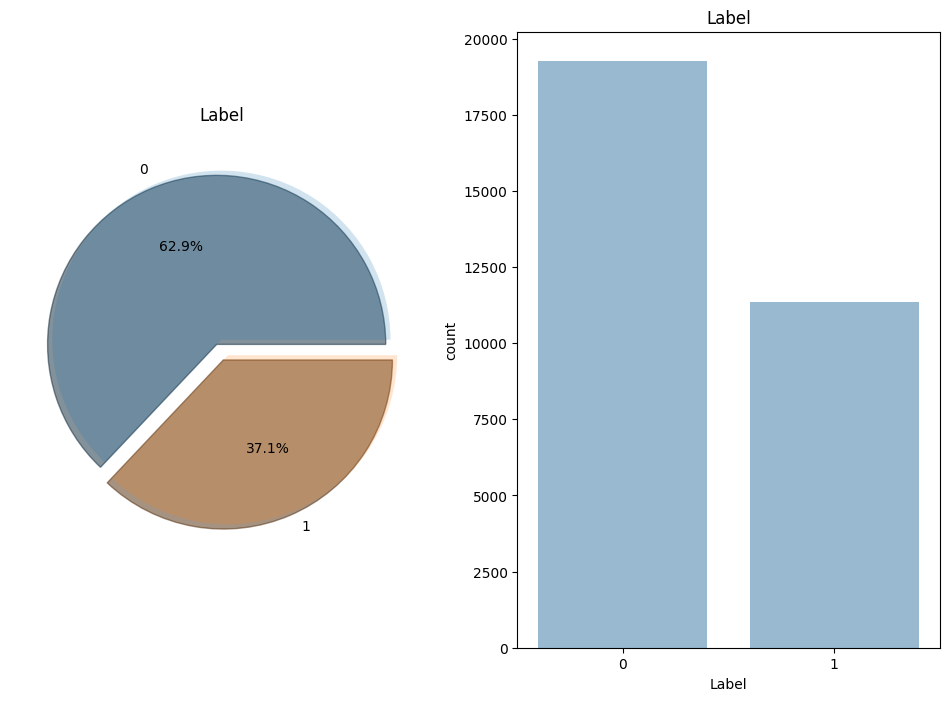

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12, 8))

# Vẽ biểu đồ pie cho cột 'Label'
df['Label'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, wedgeprops={'alpha': 0.2}
)

ax[0].set_title('Label')
ax[0].set_ylabel('')

# Vẽ biểu đồ countplot cho cột 'Label'
sns.countplot(x='Label', data=df, ax=ax[1], alpha=0.5)
ax[1].set_title('Label')

plt.show()


In [18]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1


In [19]:
comment_values = df[df.Sentence.str.contains('#|--|//')]

In [20]:
comment_values.count()[0] # How many comments symbols are in the payloads.


C:\Users\21522\AppData\Local\Temp\ipykernel_24612\3249928980.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



np.int64(5905)

In [21]:
from_values = df[df.Sentence.str.contains('from')]

In [22]:
l = list(from_values.Sentence)

tables = []
for i in l:
    x = i[i.index('from')+5:].split(' ')
    if x[0] not in tables and len(x[0]) > 1:
        tables.append(x[0])
print(tables)

['users', 'syscolumns', 'sysobjects', 'information_schema.tables--', 'temp', 'where', 'wapiti', 'generate_series', 'information_schema.character_sets', 'dual', 'pg_sleep', 'all_users', 'sysibm.systables', 'rdb$database', 'sysusers', 'mysql.db', 'domain.domains', 'rdb$fields', 'master..sysdatabases', 'information_schema.system_users', 'dual--', 'dual#', 'WHERE', 'ROM', 'JOIN']


In [23]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\21522\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\21522\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\21522\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\21522\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
All frequencies, including STOPWORDS:
        Frequency
Word             
)           50682
(           45635
select      22494
=           17735
,           17640
from        16154
'           15269
*            9839
1            9793
where        8267


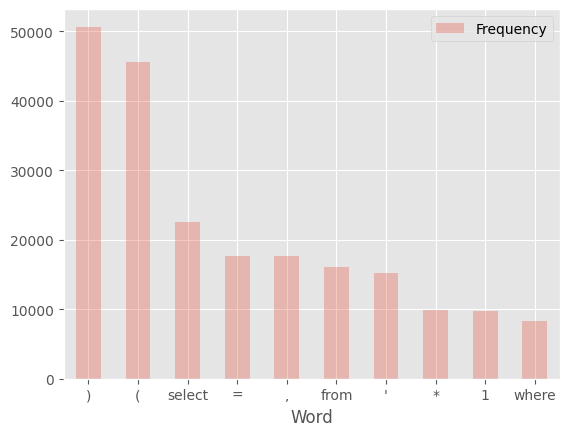

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Example for loading your DataFrame (ensure your CSV file is loaded)
# df = pd.read_csv('SQLiV3.csv', encoding='utf-8')

# You can use this line to check available matplotlib styles
print(plt.style.available)

# Select a style that is available (or use 'ggplot' if 'seaborn-whitegrid' is missing)
# For example, change it to 'ggplot' or any style listed by `plt.style.available`
plt.style.use('ggplot')  # You can replace 'ggplot' with a valid style from the list

# Tokenizing the sentences
top_N = 10
payloads = df.Sentence.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(payloads)
word_dist = nltk.FreqDist(words)

# Printing word frequencies
print('All frequencies, including STOPWORDS:')
print('=' * 60)

# Create a DataFrame for the top N most common words
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency']).set_index('Word')

# Output result
print(rslt)
print('=' * 60)

# Plotting the bar chart
rslt.plot.bar(rot=0, alpha=0.3)

# Show the plot
plt.show()


In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import pickle

In [27]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Label'], test_size=0.2, random_state=42)


In [29]:
# Tiến hành vector hóa
vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_tfidf)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.994609604704345
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3828
           1       1.00      0.99      0.99      2294

    accuracy                           0.99      6122
   macro avg       1.00      0.99      0.99      6122
weighted avg       0.99      0.99      0.99      6122



In [31]:
# Lưu lại model
with open('sql.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [32]:
# Lưu lại file vector
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [13]:
import pickle
def sql_detect(query):
    with open('sql.pkl', 'rb') as model_file:
        load_model=pickle.load(model_file)
    
    with open('tfidf_vectorizer.pkl', 'rb') as vectorize_file:
        load_vectorizer = pickle.load(vectorize_file)
    
    query_tfidf=load_vectorizer.transform([query])

    predict = load_model.predict(query_tfidf)

    return "SQL Injection Detected" if predict[0]==1 else "Safe"

print(sql_detect("id = -1 UNION SELECT username, password FROM admin--"))

Safe
